# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [1]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [2]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1225 to 2143
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1898 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1901 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1885 non-null   object 
 7   website url          1735 non-null   object 
 8   menu url             720 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1070 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [3]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1225 to 2143
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1898 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1901 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1885 non-null   object 
 7   website url          1735 non-null   object 
 8   menu url             720 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1070 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
1225,#462,Le Pain Quotidien Korenmarkt,3.5 of 5 bubbles,119 reviews,$$ - $$$|Cafe|European|Vegetarian Friendly,"Korenmarkt 16 Post Plaza, Ghent 9000 Belgium",+32 9 269 04 70,https://www.lepainquotidien.com/be/en/location...,https://www.lepainquotidien.com/be/fr/menu,True,bonjour@lepainquotidien.com,False,False,4.0,3.5,3.5,-1.0,We're a Belgian bakery and restaurant serving ...,Wij zijn een Belgische bakkerij en restaurant ...,No pricing available,"Cafe, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Brunch","Takeout, Seating, Serves Alcohol, Table Service",12725361
1948,#640,Restaurant Safi Safi,3.5 of 5 bubbles,11 reviews,$$ - $$$|Moroccan|Mediterranean,"Reinaertstraat 101, Ghent 9000 Belgium",+32 477 63 33 33,http://www.safisafi.be/,NaN,True,restaurantsafisafi@hotmail.com,False,False,3.0,4.0,4.0,-1.0,NaN,NaN,No pricing available,"Moroccan, Mediterranean",NaN,"Breakfast, Lunch, Dinner","Reservations, Seating, Table Service",13570546


we will start by turning rank, general rating, number of reviews to numerical values

In [4]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [5]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [6]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

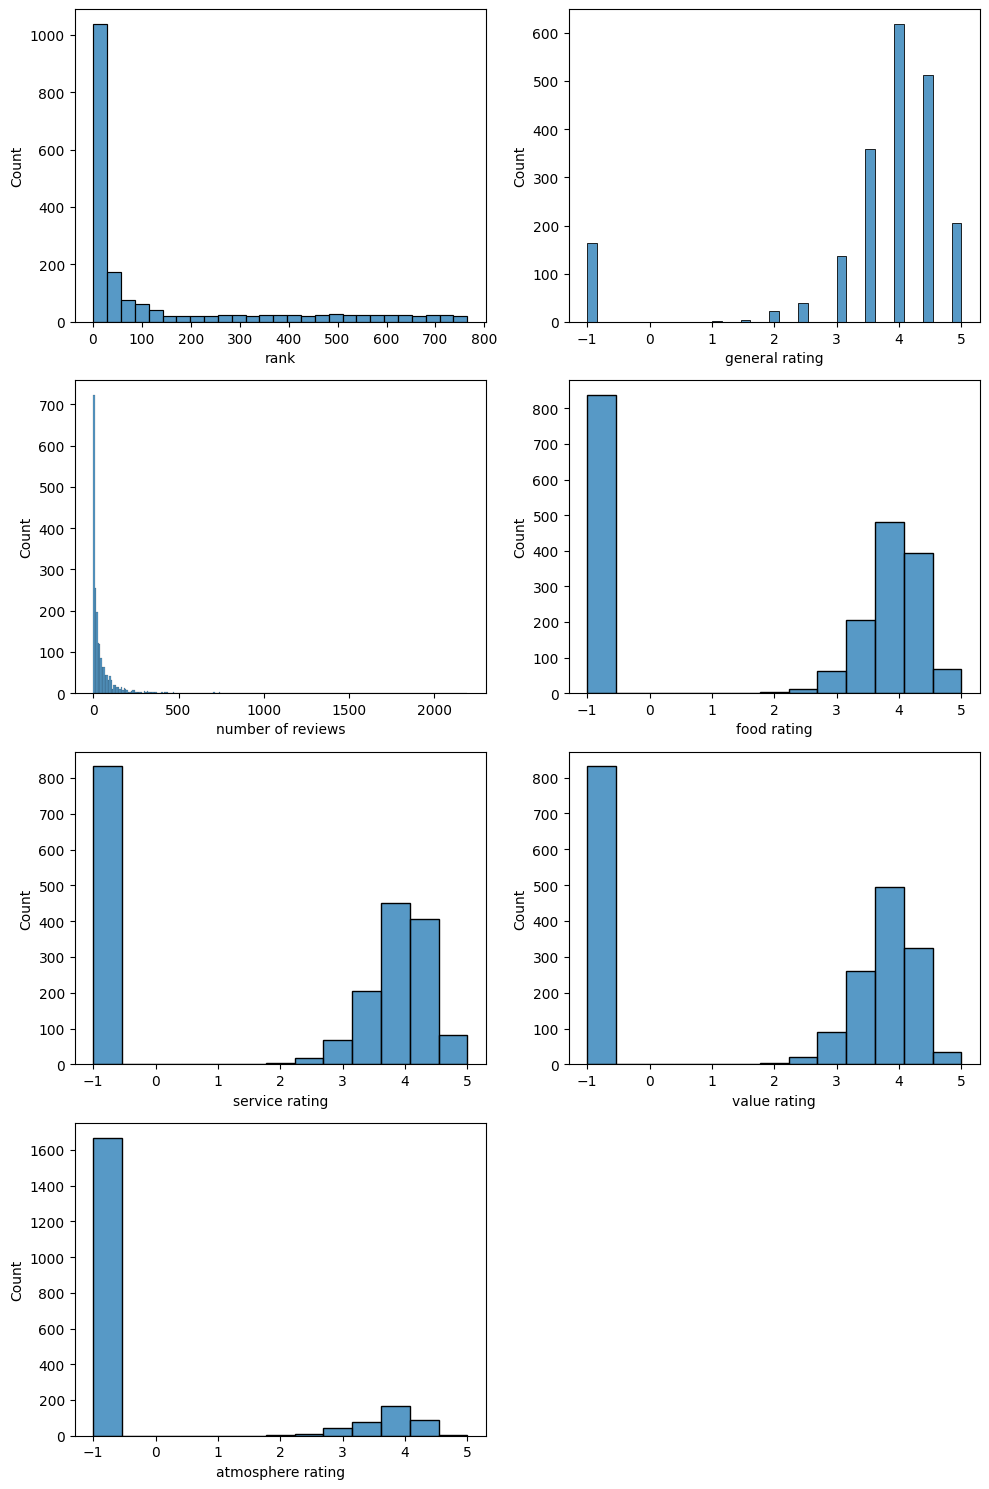

In [7]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

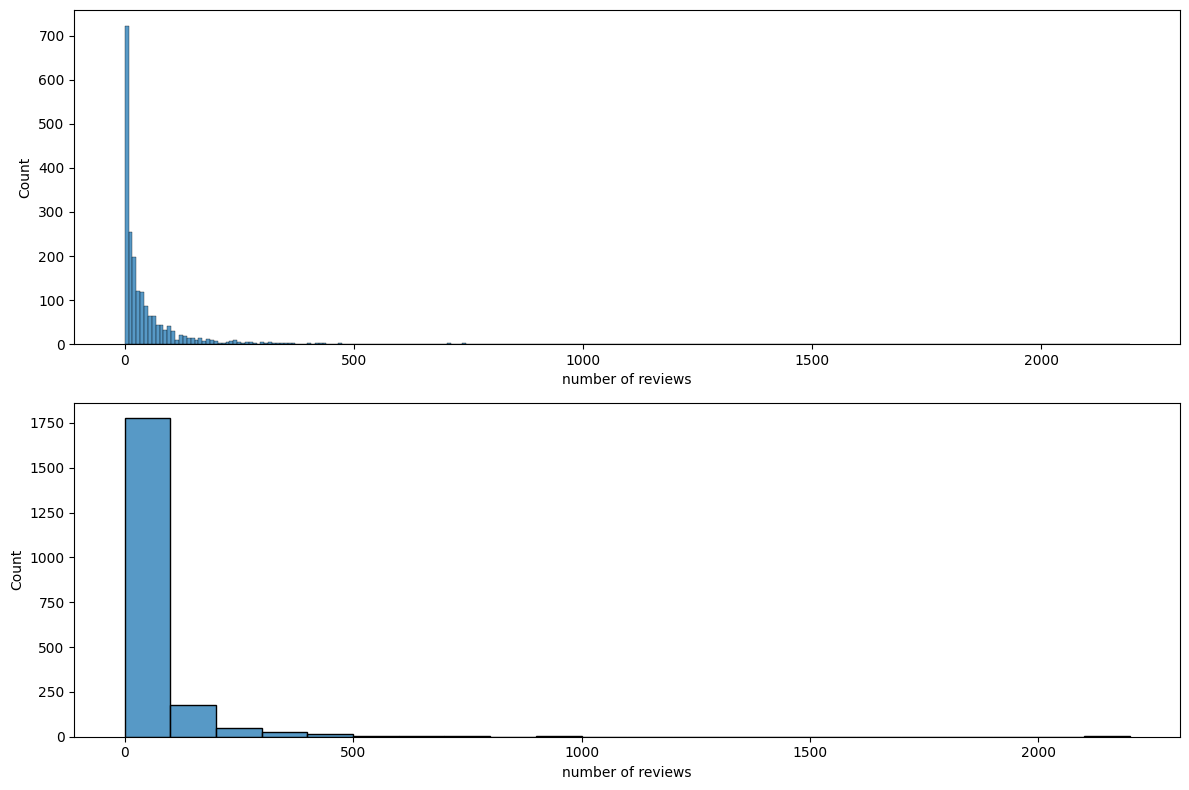

In [8]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [9]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      164
1.0      112
2.0       95
3.0       78
4.0       71
        ... 
267.0      1
315.0      1
216.0      1
187.0      1
278.0      1
Name: number of reviews, Length: 274, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [10]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


7.95% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [11]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 21.75%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [12]:
df_train['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [13]:
df_train["address"]

1225         Korenmarkt 16 Post Plaza, Ghent 9000 Belgium
1948               Reinaertstraat 101, Ghent 9000 Belgium
744           Oudenaardsesteenweg 131, Dries 9800 Belgium
2481         Geraard Mercatorstraat 2, Ghent 9000 Belgium
2016                   Kerkstraat 114, Eeklo 9900 Belgium
                              ...                        
1037                  Schuurkenstraat, Ghent 9000 Belgium
2092                  Motorstraat 113, Ghent 9000 Belgium
68      Kortrijksesteenweg 259, Sint-Martens-Latem 983...
1964            Leenstraat 46 Gavere, Vurste 9890 Belgium
2143                      Hopmarkt 44, Aalst 9300 Belgium
Name: address, Length: 2064, dtype: object

In [14]:
import requests
import urllib.parse
def getCoordinates(address):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    # print(response)
    if(len(response)>0):
        return response[0]["lat"],response[0]["lon"]
    else:
        return np.NaN,np.NaN;

In [15]:
coords=df_train.apply(lambda row : getCoordinates(row["address"]),axis=1)
#langer dan 12 min, geef op ಥ_ಥ

In [ ]:
coords

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer

# Loading reviews dataset

In [3]:
import pandas as pd
df = pd.read_csv("./tripadvisor_dataset/reviews.csv")
print("Number of reviews in dataset: ",df.shape[0])
print(df.head(10))
df

Number of reviews in dataset:  136173
         id      reviewer name  \
0  13969825           bertd818   
1  13969825       593laetitiad   
2  13969825           612ellen   
3  13969825             j0ycal   
4  13969825  Global45882037169   
5  13969825        672lindsayv   
6  13969825          Raphael V   
7  13969825           MikeBhdt   
8  13969825            truwant   
9  13969825             SVerst   

                                               title                date  \
0                     supper snelle en lekkere lunch  September 26, 2022   
1     Un délicieux repas aux saveurs de la Thaïlande  September 24, 2022   
2                      Altijd leuk om terug te komen  September 19, 2022   
3  Perfect onthaal/gastvrijheid, superlekker eten...  September 19, 2022   
4                                           genieten  September 19, 2022   
5                                 Vrijgezellen diner  September 18, 2022   
6                                   Super restaurant  S

,id,reviewer name,title,date,rating,review
0,13969825,bertd818,supper snelle en lekkere lunch,"September 26, 2022",5.0,"supper lekker gegeten tijdens de middag, als w..."
1,13969825,593laetitiad,Un délicieux repas aux saveurs de la Thaïlande,"September 24, 2022",5.0,Un menu lunch très bien équilibré aux niveaux ...
2,13969825,612ellen,Altijd leuk om terug te komen,"September 19, 2022",5.0,Super gezellig restaurant met super bediening ...
3,13969825,j0ycal,"Perfect onthaal/gastvrijheid, superlekker eten...","September 19, 2022",5.0,"Perfect onthaal, lekker eten. Heel goede lunch..."
4,13969825,Global45882037169,genieten,"September 19, 2022",5.0,"verrassend lekker gegeten, een mooi en rustig ..."
...,...,...,...,...,...,...
136168,1199541,Geertlieve,Onbeschofte baas,"September 8, 2012",1.0,"Vanavond eens iets gezellig gaan eten, dit was..."
136169,1199541,frans g,Slechtste ervaring ooit!,"June 1, 2012",1.0,Wenst u uiterst onvriendelijk te worden behand...
136170,1199541,fideba,To be avoided at all times,"July 26, 2011",1.0,"This restaurant is a joke. Service was fast, b..."
136171,1199541,Jan D,"fast, friendly and very good food","November 4, 2009",5.0,"The Graaf van Egmo,t is in my opinion one of t..."


### We will look if allowing dogs in the restaurant has a positive outcome, we are not interested in a doggy bag option at the moment

In [4]:
df_nan_dropped = df.dropna()

df_dog = df_nan_dropped[df_nan_dropped['review'].str.contains(r"\b(dog|hond|honden)\b")]
# print(df_dog)


# print(df_dog_without_doggy_bag["review"].values)
print(f"entries:{df_dog.shape[0]}")
df_rating = pd.DataFrame(df_dog.groupby(["rating"])['rating'].count())
df_rating.columns = ["count"]
df_rating['%'] = 100 * df_rating["count"] / df_dog.shape[0]
df_rating

C:\Users\xande\AppData\Local\Temp\ipykernel_15028\4274849928.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_dog = df_nan_dropped[df_nan_dropped['review'].str.contains(r"\b(dog|hond|honden)\b")]


entries:270


,count,%
rating,,
1.0,50,18.518519
2.0,24,8.888889
3.0,34,12.592593
4.0,88,32.592593
5.0,74,27.407407


### Now we see the rating and their cumulative and absolute frequency for all reviews containing the word "dog" (and "hond" in Dutch). Now we will look at the 1.0 ratings and their explanation



In [5]:
df_dog.loc[df_dog['rating'] == 1.0].values


array([[877202, 'A5387MQpatrickv', 'Afschuwelijk ', 'January 13, 2019',
        1.0,
        'Je geeft jouw hond nog lekkerder te eten. Ontvangst was wel leuk en enthousiast. Spareribs saai bandnaam en niet lekker mals garnering van het eten as lach wekkend. Nee dit nooit meer'],
       [7987911, 'philipvanremo', 'the rudest experience ever',
        'August 6, 2019', 1.0,
        "If you like dog food and on top being treated like a dog this is the right place for you : never seen waiters like this, very rude and pretending this is funny, I had to calm them down actually, throwing the food on the table, putting a glass of wine in front of a 12 year old, basically endless mistakes and consistent misbehavior.Had a Belgian stew with fries that were so poor you really wonder where to got this from. I'm sure the worst frietkot beats this place quality wise. This is a total disgrace for the city of Ghent."],
       [2365952, 'Crzy_san', 'Arrogante werknemer', 'October 5, 2019',
        1.0,

### when reading, we see that their are two 'point of views' that are interesting. There are people that give a bad review because they are not welcome with their dog and people who feel that a dog is not appropriate in a restaurant. We will try to analyse this further by plotting the dog reviews against the coordinates.

In [45]:
df_coo = pd.read_csv("./coordinates.csv").dropna()

# print("coordinates:  ",df_coo.shape[0])
# print(df_coo.head(10))

df_coo["coord"] = df_coo["coord"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")
df_coo[["latitude", "longitude"]]  = df_coo["coord"].str.split(",",1, expand=True)

df_coo['latitude'] = pd.to_numeric(df_coo['latitude'])
df_coo['longitude'] = pd.to_numeric(df_coo['longitude'])
df_coo

C:\Users\xande\AppData\Local\Temp\ipykernel_15028\521741908.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_coo["coord"] = df_coo["coord"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")


,Unnamed: 0,coord,id,latitude,longitude
0,0,"51.0548994, 3.7223248",13969825,51.054899,3.722325
1,1,"50.7887051, 4.052819574178704",740727,50.788705,4.052820
2,2,"0, 0",12188645,0.000000,0.000000
3,3,"51.0582196, 3.7222621",9710340,51.058220,3.722262
4,4,"51.0268308, 4.1005587",8298124,51.026831,4.100559
...,...,...,...,...,...
2576,2576,"50.8528124, 3.7866609",18220557,50.852812,3.786661
2577,2577,"50.9032568, 3.5050821",23571474,50.903257,3.505082
2578,2578,"50.947908850000005, 4.097626326789348",3956680,50.947909,4.097626
2579,2579,"50.9478251, 4.098753863305806",23363568,50.947825,4.098754


### after loading the coordinates and cleaning the data we merge the coordinates dataframe with the reviews dataframe based on id

In [46]:
df_merged = df_coo.merge(df_dog, how="inner", on="id")
df_merged

,Unnamed: 0,coord,id,latitude,longitude,reviewer name,title,date,rating,review
0,1,"50.7887051, 4.052819574178704",740727,50.788705,4.052820,L0laXxx,Hartelijk,"June 12, 2016",5.0,We werden hartelijk ontvangen door de dochter ...
1,1,"50.7887051, 4.052819574178704",740727,50.788705,4.052820,wim_verheyden,"Aangename verrassing, toprestaurantje","November 1, 2015",5.0,Gelegen in het landelijke Liefferinge (Ninove)...
2,13,"51.1690027, 4.1391715",6959268,51.169003,4.139171,MissChantal,Mooi pand en vriendelijke bediening,"October 26, 2016",3.0,Heel vriendelijke ontvangst en de bediening is...
3,16,"50.930108950000005, 4.041852779124971",740625,50.930109,4.041853,corinnew258,Verjaardagsdiner,"June 2, 2018",4.0,Een uitstekend visrestaurant en dit in het bin...
4,18,"51.0542464, 3.7173773",1072090,51.054246,3.717377,Sightsee819518,Eens uit eten,"August 20, 2019",5.0,We zijn er al een paar keer geweest en terug a...
...,...,...,...,...,...,...,...,...,...,...
265,2316,"50.7724713, 3.893642812667262",1223250,50.772471,3.893643,Marnick V,eten trekt op niks schandalig gewoon,"August 23, 2013",1.0,Kikkerbilletjes volledig verbrand nog te slech...
266,2327,"51.05428325, 3.723116093159806",21311330,51.054283,3.723116,Stay521769,Lies,"December 11, 2021",1.0,Walked in sat down @ 4pm to be told that as I ...
267,2344,"51.123194100000006, 4.216460472895827",13483884,51.123194,4.216460,HymerWieMie,Als het goed is mag het ook gezegd !,"September 1, 2019",5.0,Vorig jaar zijn we hier 2 keer komen eten en v...
268,2354,"50.9384958, 4.0389045",1199541,50.938496,4.038905,Anjadegr,Heeeel klantonvriendelijke zaak,"September 27, 2020",1.0,Vandaag meegemaakt : We zaten op terras buiten...


### now we will define a bounding to plot our geographic data on a map ( the bounding map is defined with the help of openstreetmap.org)

In [50]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


Bbox = (50.7139,50.7139,3.3151,4.3423)


### we read the image map png to plot on

In [56]:
map = plt.imread("east_flanders.png")


### Now we can create te plot with the picture and the dataset

C:\Users\xande\AppData\Local\Temp\ipykernel_15028\3611371131.py:4: UserWarning: Attempting to set identical left == right == 50.7139 results in singular transformations; automatically expanding.
  ax.set_xlim(Bbox[0],Bbox[1])


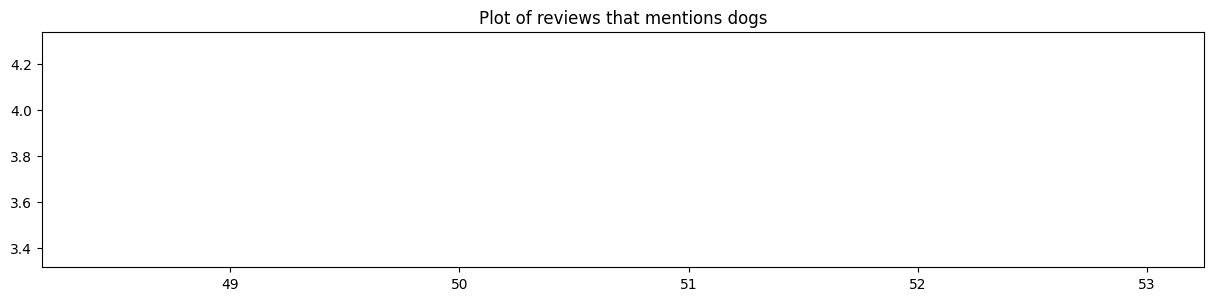

In [57]:
figure, ax = plt.subplots(figsize = (15,16))
ax.scatter(df_merged.longitude, df_merged.latitude, zorder=1, alpha= 0.2, c='b',s=10)
ax.set_title('Plot of reviews that mentions dogs')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')